In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
%matplotlib inline
%config InlineBackend.figure_format ='retina'

## Read in Data

In [2]:
df = pd.read_csv('../data/all_tweets_clean.csv')

In [3]:
df.shape

(4003, 3)

## EDA

### TFIDF Vectorizer

In [4]:
h_tvec = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5, max_df=1.0,ngram_range=(1,2))

In [5]:
h_term_mat = h_tvec.fit_transform(df['text'])

In [6]:
h_term_df = pd.DataFrame(h_term_mat.toarray(), columns=h_tvec.get_feature_names())

Computing max TFIDF weights for all features

In [7]:
h_wts_allwords = []

for column in h_term_df.columns:
    h_wts_allwords.append(h_term_df[column].max())


In [8]:
h_tfidf_allwords = pd.DataFrame({'words':h_term_df.columns, 'weights':h_wts_allwords})

In [9]:
h_tfidf_allwords.sort_values('weights', ascending=False,inplace=True)

Looking for vectorized words that give insights to hurricane related needs

In [10]:
for word in h_tfidf_allwords['words']:
    print(f"'{word}',")

'dangerous',
'catch',
'together',
'governments',
'protect',
'closing',
'spread',
'myths',
'breastfeeding',
'live',
'full',
'prevented',
'tackling',
'members',
'without',
'change',
'coronavirus',
'another',
'diets',
'wear',
'iron',
'mother',
'safely',
'customers',
'opening',
'remarks',
'wash',
'stay',
'lack',
'say',
'virtual',
'understanding',
'cases',
'happening',
'question',
'surfaces',
'yes',
'challenge',
'workplace',
'via',
'director',
'briefing',
'nursing',
'multiple',
'person',
'violence',
'find',
'improve',
'different',
'test',
'ignite',
'immunization',
'blueprint',
'thanks',
'transmitted',
'animals',
'weakness',
'travellers',
'childhood',
'obesity',
'tobacco',
'let',
'others',
'time',
'disability',
'sexual',
'stay safe',
'hi',
'anything',
'future',
'influenza',
'condoms',
'warning',
'talk',
'hepatitis',
'special',
'pm',
'stigma',
'seconds',
'try',
'suicidal',
'prepared',
'healthier',
'dr',
'considerations',
'seat',
'alone',
'thank',
'persons',
'psychosocial',
'confidence',
'mill

'drinking alcohol',
'development',
'self',
'often',
'said',
'awareness',
'risk factor',
'prohibit',
'small',
'mild cases',
'conflict',
'digital',
'saves',
'sometimes',
'highlighted',
'amp',
'bring',
'life saving',
'hydroxychloroquine',
'birth',
'drink',
'courses languages',
'third',
'announcement',
'held',
'wider',
'dna',
'point',
'donation',
'international experts',
'step',
'updated',
'countries amp',
'contact',
'signed',
'quality health',
'recognition',
'facilities',
'problems',
'alert response',
'saving',
'people affected',
'hard',
'declining',
'investing',
'reported first',
'period',
'markets',
'thrive',
'meat',
'getting sick',
'arabic',
'spanish',
'managed',
'remind',
'performance',
'chains transmission',
'requests',
'first step',
'climate change',
'diseases like',
'tooth',
'equitably',
'south',
'online courses',
'coordinating',
'health people',
'must',
'prevent infections',
'places',
'professor',
'committee today',
'gloves respirators',
'control',
'communications',
'affect',
'gui

'long term',
'break',
'build',
'reduction',
'involved',
'colleagues',
'participants',
'sequences',
'human health',
'learned',
'helping',
'excessive',
'stay healthy',
'almost million',
'sanitation',
'novel nc',
'causes',
'ramp',
'lab testing',
'close contact',
'fit children',
'future fit',
'detected',
'large numbers',
'addition',
'coming together',
'prevent transmission',
'worker',
'days since',
'clinics',
'many people',
'severe acute',
'recent',
'onward',
'onward transmission',
'confirmed case',
'state',
'country offices',
'cough sneeze',
'amp people',
'family friends',
'health many',
'voluntary',
'recovery',
'care workers',
'anyone',
'effective vaccine',
'ultimately',
'lives',
'spread countries',
'together amp',
'marketing breast',
'production equitable',
'masks respirators',
'past days',
'health products',
'must act',
'strengthen health',
'leadership',
'distribute',
'guided',
'number countries',
'keep world',
'prices',
'line',
'cases outside',
'agency',
'makers',
'design',
'new guide

selected features

In [13]:
features = ['together','collaboration', 'solidarity','engaging','launched solidarity','share', 'pool']

In [14]:
df_chart = h_term_df[features]

In [15]:
h_wts = []

for column in df_chart.columns:
    h_wts.append(df_chart[column].max())


In [16]:
h_tfidf = pd.DataFrame({'words':df_chart.columns, 'weights':h_wts})

In [17]:
h_tfidf.sort_values('weights', inplace=True)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text yticklabel objects>)

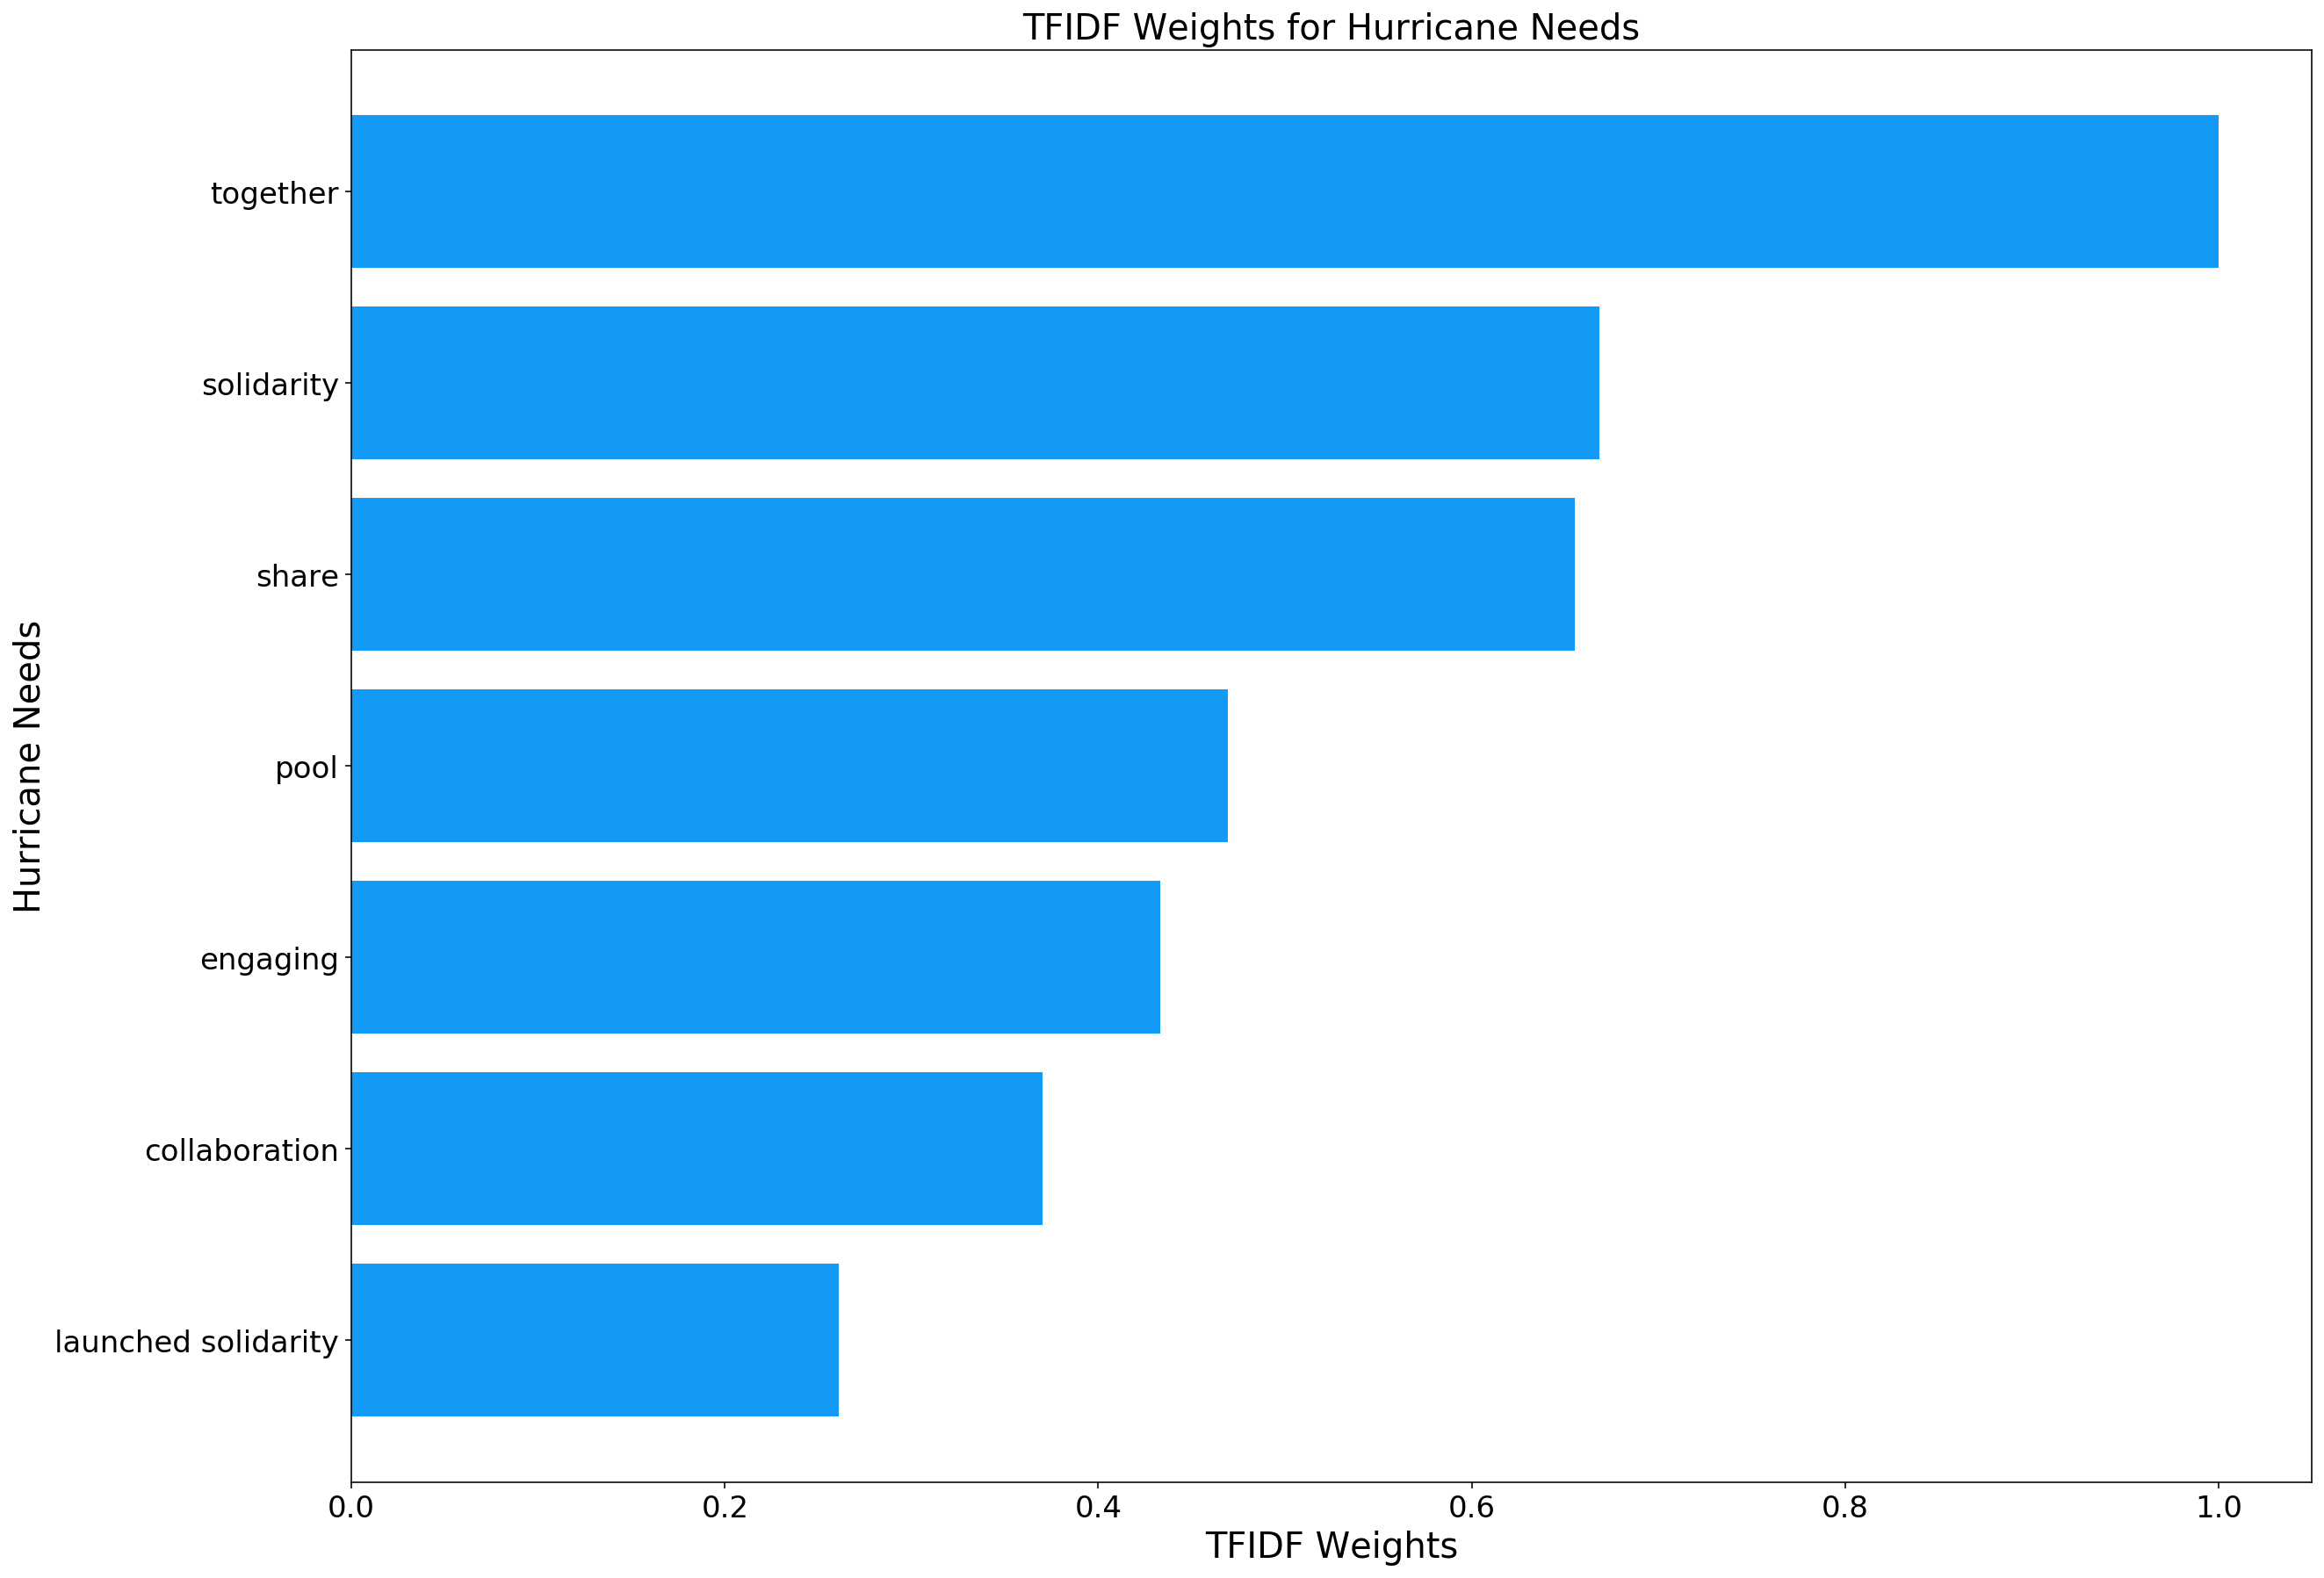

In [18]:
plt.figure(figsize=(20,15))
plt.barh(h_tfidf['words'],
        h_tfidf['weights'],
        color='#1399F6')
plt.title('TFIDF Weights for Hurricane Needs', fontsize=20)
plt.xlabel('TFIDF Weights', fontsize=20)
plt.ylabel('Hurricane Needs', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)